# Pytorch Demo

tensor([[0.2043, 0.5747, 0.0879],
        [0.3725, 0.2815, 0.2044],
        [0.9219, 0.1185, 0.0305],
        [0.8766, 0.3535, 0.4552],
        [0.5870, 0.3019, 0.9603]])


2.3.1.post101


## Loading the Data
PyTorch provides two data primitives: 
- torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data
- torch.utils.data.DataLoader

torch.utils.data.Dataset allows you to use pre-loaded datasets as well as your own data and 
torch.utils.data.DataLoader is an iterator which helps us loop through the data while being able to
- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers.

In [18]:
## 
BATCH_SIZE = 32

## 
transform = transforms.Compose(
    [transforms.ToTensor()]) # 

## 
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## 
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

Use the matplotlib libirary to chek out the images

In [21]:
## 
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() # 
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 

##

iter() calls the __iter__() method on the trainloader which returns an iterator. 
next() then calls the __next__() method on that iterator to get the first iteration. 
Running next() again will get the second item of the iterator, etc.


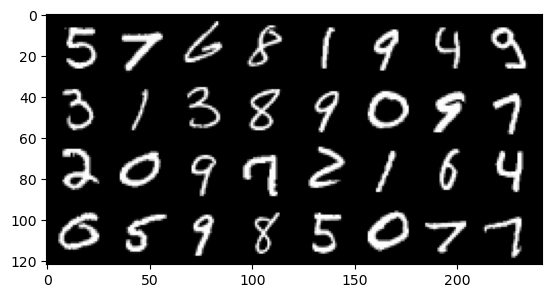

In [23]:
## show image

In [1]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

NameError: name 'trainloader' is not defined

The images are 28 by 28 matrices with its element being range from 0 to 255.Each batch has 32 images.

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
  (4): Softmax(dim=1)
)


batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


In [50]:
## utility function to compute accuracy
def get_accuracy(output, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [52]:
## train the model
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    ## 
    model = model.train()

    ## 
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device) # 
        labels = labels.to(device) # 

        ##
        predictions = model(images) # 
        loss = criterion(predictions, labels) # 
        optimizer.zero_grad()
        loss.backward() 

        ## 
        optimizer.step()

        train_running_loss += loss.detach().item() # 
        train_acc += get_accuracy(predictions, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i)) 

Epoch: 0 | Loss: 1.4890 | Train Accuracy: 97.57
Epoch: 1 | Loss: 1.4852 | Train Accuracy: 97.95
Epoch: 2 | Loss: 1.4830 | Train Accuracy: 98.13
Epoch: 3 | Loss: 1.4807 | Train Accuracy: 98.32
Epoch: 4 | Loss: 1.4789 | Train Accuracy: 98.53


In [54]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 97.53


In [55]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
  (4): Softmax(dim=1)
)


In [58]:
print(outputs)

tensor([[2.0526e-14, 9.9996e-01, 1.1902e-09, 3.8002e-08, 6.0172e-11, 1.5224e-10,
         1.0628e-12, 4.0929e-05, 3.6179e-06, 2.9995e-13],
        [1.5954e-17, 6.0724e-14, 1.0000e+00, 5.3764e-09, 6.6900e-36, 5.5139e-17,
         1.5385e-24, 1.5575e-14, 1.2873e-10, 1.8683e-21],
        [1.4498e-15, 1.4074e-11, 1.0942e-07, 9.9997e-01, 4.3394e-28, 2.9134e-05,
         6.7030e-27, 2.4727e-17, 4.0688e-07, 2.7781e-09],
        [7.5323e-28, 3.7443e-33, 1.3910e-23, 5.5038e-24, 1.0000e+00, 2.6408e-18,
         6.4640e-27, 1.8018e-19, 4.4174e-16, 2.8513e-11],
        [2.3716e-19, 1.1321e-28, 5.4569e-29, 4.9019e-15, 1.5090e-29, 1.0000e+00,
         1.2875e-26, 2.8038e-31, 6.0383e-12, 1.0115e-22],
        [3.7561e-19, 1.5220e-25, 6.4312e-14, 1.5947e-20, 8.1862e-23, 3.5356e-13,
         1.0000e+00, 6.3909e-35, 2.2619e-16, 7.5977e-28],
        [2.0614e-21, 3.7199e-26, 6.1143e-16, 1.1471e-14, 2.0462e-30, 3.9243e-25,
         7.2341e-40, 1.0000e+00, 6.4396e-20, 1.6473e-19],
        [5.5693e-15, 1.9547

In [60]:
torch.sum(outputs, 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)